# Deep learning vs. XGBoost on network traffic data

I use the [fast.ai](https://www.fast.ai/) deep learning framework for one of its newest applications: classification on tabular data. I compare its performance against the incumbent best tool in the field, gradient boosting with [XGBoost](https://xgboost.readthedocs.io/en/latest/), as well as against various scikit-learn classifiers in detecting network intrusion traffic and classifying common network attack types (e.g., FTP-BruteForce, DOS-GoldenEye, BruteForce-XSS, SQL-Injection, Infiltration, BotAttack). In line with recent prominence on other tabular datasets, fast.ai is on par with XGBoost and sklearn’s Random Forest Classifier, demonstrating high accuracy (up to 99%), with low false positive and negative rates in the classification of various intrusion types.

**Pretty powerful!**


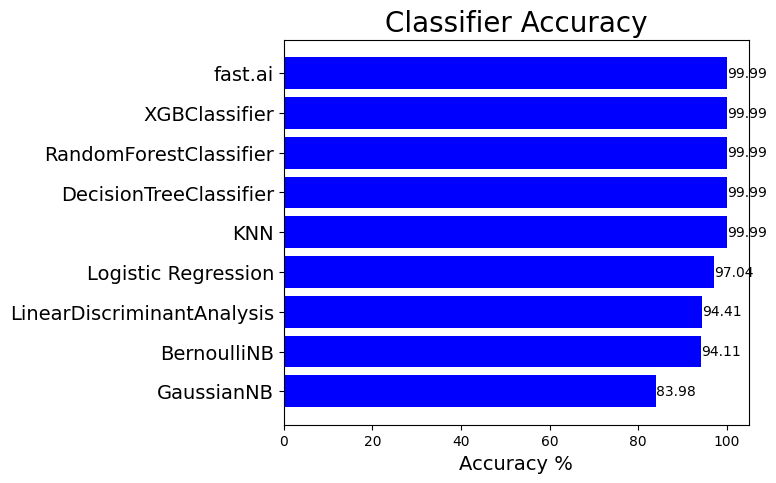


# Background

Recent advancements in deep learning algorithms have facilitated significant strides in addressing challenging computer science problems and applications in nearly all areas of life. These breakthroughs have extended to areas such as computer vision, natural language processing, complex reasoning tasks like playing board games (e.g., Go, Chess), and even surpassing human champions.

In light of the ongoing surge in cyber-attacks and the increased demand for AI usage in the context of cybersecurity [MIT Report](https://wp.technologyreview.com/wp-content/uploads/2022/07/Deep-Learning-Delivers-proactive-Cyber-defense-FNL.pdf), in this project, I investigate the effectiveness and capacity of a powerful new deep learning algorithm, fast ai, in the domain of network intrusion detection and compare its performance against the incumbent best tool in the field, gradient boosting with XGBoost, as well as against various scikit-learn classifiers (random forest, knn, naïve bayes, etc.).

In a previous study, [Basnet and colleagues (2018)]( https://isyou.info/jisis/vol9/no4/jisis-2019-vol9-no4-01.pdf) have shown that the fastai deep learning algorithm provided the highest accuracy of about 99% compared to other well-known deep learning frameworks (e.g., Keras, TensorFlow, Theano) in detecting network intrusion traffic and classifying common network attack types using the [CSE-CIC-IDS2018 dataset](https://www.unb.ca/cic/datasets/ids-2018.html) (same dataset as I used here).

Deep learning is the gold standard for large, unstructured datasets, including text, images, and video and has been battle tested in areas such as computer vision, natural language processing, and complex reasoning tasks. However, for one specific type of dataset –one of the most common datasets used in cybersecurity– deep learning typically falls behind other, more “shallow-learning” approaches such as decision tree algorithms (random forests, gradient boosted decision trees): TABULAR DATA.

Indeed, in a [systematic review and meta-analysis](https://arxiv.org/abs/2207.08815) last year, Léo Grinsztajn, Edouard Oyallon, Gaël Varoquaux have shown that, overall, tree-based models (random forests and XGBoost) outperform deep learning methods for tabular data on medium-sized datasets (10k training examples). However, the gap between tree-based models and deep learning becomes narrower as the dataset size increases (here: 10k -> 50k).

Here, I extend these lines of investigation, by comparing fast ai’s deep learning framework with XGBoost as well as other scikit-learn classifiers on a relatively large dataset of network traffic data. Given the large size of the used datasets in this project, I expect fast.ai to achieve comparable results to the other algorithms.

# Dataset

I use the open source CSE-CIC-IDS2018 dataset, a contemporary network intrusion dataset produced and released in 2018(1).

Further details about the datasets, including the experiments and testbeds utilized for dataset generation, can be found following this [Link](https://www.unb.ca/cic/datasets/ids-2018.html). The datasets comprise both benign (normal) network traffic and malicious traffic resulting from various network attacks, briefly outlined below. Table 1 provides an overview of the number of samples and network traffic types in each dataset.

**Table 1: Number of samples and network traffic types in each dataset**


| File Name      | Traffic Type     | # Samples | # Dropped |
| :------------- | :--------------: | --------: | --------: |
| 02-14-2018.csv | Benign           |   663,808 | 3818      |
|                | FTP-BruteForce   |   193,354 | 6         |
|                | SSH-Bruteforce   |   187,589 | 0         |
| -------------- | ---------------  | --------- | --------- |
| 02-15-2018.csv | Benign           |   988,050 | 8027      |
|                | DOS-GoldenEye    |    41,508 | 0         |
|                | DOS-Slowloris    |    10,990 | 0         |
| -------------- | ---------------  | --------- | --------- |
| 02-16-2018.csv | Benign           |   446,772 | 0         |
|                | Dos-SlowHTTPTest |   139,890 | 0         |
|                | DoS-Hulk         |   461,912 | 0         |
| -------------- | ---------------  | --------- | --------- |
| 02-22-2018.csv | Benign           | 1,042,603 | 5610      |
|                | BruteForce-Web   |       249 | 0         |
|                | BruteForce-XSS   |        79 | 0         |
|                | SQL-Injection    |        34 | 0         |
| -------------- | ---------------  | --------- | --------- |
| 02-23-2018.csv | Benign           | 1,042,301 | 5708      |
|                | BruteForce-Web   |       362 | 0         |
|                | BruteForce-XSS   |       151 | 0         |
|                | SQL-Injection    |        53 | 0         |
| -------------- | ---------------  | --------- | --------- |
| 03-01-2018.csv | Benign           |   235,778 | 2259      |
|                | Infiltration     |    92,403 | 660       |
| -------------- | ---------------  | --------- | --------- |
| 03-02-2018.csv | Benign           |   758,334 | 4050      |
|                | BotAttack        |   286,191 | 0         |

## Data cleaning
Extensive data cleaning and feature engineering were needed to process the data for the over 6 million entries in this dataset. Following the same approach as Basnet and colleagues, after downloading the dataset, I conducted an analysis of its characteristics and performed necessary cleaning procedures. The dataset comprises original traffic stored in pcap files, logs, as well as preprocessed, labeled, and feature-selected CSV files. My focus was on the labeled CSV files, encompassing a total of 80 traffic features extracted using the CICFlowMeter. This dataset encompasses both normal (benign) and attack traffic, featuring various common attack types outlined in the preceding section, distributed across seven CSV files.

To streamline my experiments and due to an abundance of available samples, I decided to simplify by discarding instances with Infinity, NaN, or missing values. Additionally, I converted timestamps to Unix epoch numeric values and addressed issues such as parsing and removing repeated column headers in certain data files. Approximately 20,000 samples were eliminated during the data cleanup process. Table 1 provides a summary of the datasets utilized in the experiments post the data cleanup step. The "Number of Samples Remaining" column denotes the total samples retained after the removal of instances from each category, as outlined in the last column. Each dataset contains a specific number of traffic samples belonging to benign and one or more attack types, repeated across multiple datasets, as summarized in Tables 1 and 2.

**Table 2: Total number of traffic data samples for each type among all the datasets**

| Traffic Type     | # Samples |
| ---------------- | --------: |
| Benign           | 5,177,646 |
| FTP-BruteForce   |   193,354 |
| SSH-BruteForce   |   187,589 |
| DOS-GoldenEye    |    41,508 |
| Dos-Slowloris    |    10,990 |
| Dos-SlowHTTPTest |   139,890 |
| Dos-Hulk         |   461,912 |
| BruteForce-Web   |       611 |
| BruteForce-XSS   |       230 |
| SQL-Injection    |        87 |
| Infiltration     |    92,403 |
| BotAttack        |   286,191 |
| Total Attack     | 1,414,765 |

## System prep

In [ ]:
# Running this notebook on google colab with the colab pro subscription and higher RAM + GPU acceleration
# Check available memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Check GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jan 25 10:18:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Show run-time
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
time: 276 µs (started: 2024-01-25 10:18:16 +00:00)


# Tabular learning with fast.ai
Here, I am providing a walk-through using one of the seven datasets ("03-02-2018.csv") available in the CSE-CIC-IDS2018 dataset. An overview of the overall results including all datasets is available in the [Github Repo](https://github.com/FUenal/deep-learning-cybersecurity-ids/tree/main). First, I start by using the fast.ai deep learning framework.
The tabular feature in fast.ai consolidates training, validation, and, if desired, testing data into a unified TabularPandas object. This arrangement allows for refining pre-processing steps on the training data, subsequently applying them consistently to the validation and test data. As a result, with fast.ai, the tasks of normalizing, handling missing values, and identifying categories for each categorical variable are predominantly automated. Furthermore, as demonstrated later on, this processed data can be employed to train models from alternative libraries.

The first code chunk below, takes in the cleaned data, pre-processes it, build dataloaders and a learner, learns from the data, fits the model, and finally tests the predictions on the test dataset

In [ ]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
!pip install -Uqq fastai

time: 5.62 s (started: 2024-01-25 10:18:16 +00:00)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Fast AI import
from fastai.imports import *
np.set_printoptions(linewidth=130)

# to avoid displaying warnings in notebook (still visible in console)
import warnings
warnings.filterwarnings('ignore')

# # getting data from drive - You can download the dataset into your GDrive and connect to it running the code below
from google.colab import drive
drive.mount('/content/drive')

# Input data files are available in the "../input/" directory.
# list all files under the input directory
print("Files in this folder:")
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets/cse-cic-ids2018'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Mounted at /content/drive
Files in this folder:
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
/content/drive/MyDrive/Datasets/cse-cic-ids2018/Wednesday-28-02-2018_Traff

In [ ]:
#We'll define a Python context manager called clear_memory() using the contextlib module. This context manager will be used to clear memory by running Python's
# garbage collector (gc.collect()) after a block of code is executed.
import contextlib
import gc

@contextlib.contextmanager
def clear_memory():
    try:
        yield
    finally:
        gc.collect()

time: 675 µs (started: 2024-01-25 10:19:04 +00:00)


In [ ]:
# To download the full dataset
# Install the AWS CLI, available on Mac, Windows and Linux
# !pip install awscli
# Run: aws s3 sync --no-sign-request --region <your-region> "s3://cse-cic-ids2018/" dest-dir (Where your-region is your region from the AWS regions list and dest-dir is the name of the desired destination folder in your machine)
# !aws s3 sync --no-sign-request --region eu-west-3 "s3://cse-cic-ids2018/" '/content/drive/MyDrive/Datasets/cse-cic-ids2018'

# To download a selection of datasets
#!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Thursday-02-22-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress '/content/drive/MyDrive/Datasets/cse-cic-ids2018'
#!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Friday-02-23-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress '/content/drive/MyDrive/Datasets/cse-cic-ids2018'



time: 333 µs (started: 2023-12-27 15:09:57 +00:00)


## Inspect and clean dataset

In [ ]:
# review data Friday-02-03-2018
with clear_memory():
    data = pd.read_csv('/content/drive/MyDrive/Datasets/cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')

data.Label.value_counts()

Benign    762384
Bot       286191
Name: Label, dtype: int64

time: 9.99 s (started: 2024-01-25 10:19:09 +00:00)


In [ ]:
# Clean data Friday-02-03-2018
!python /content/drive/MyDrive/AI-IDS/data_cleanup.py "/content/drive/MyDrive/Datasets/cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv" "results"

cleaning /content/drive/MyDrive/Datasets/cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
total rows read = 1048576
all done writing 1044526 rows; dropped 4050 rows
time: 1min 10s (started: 2024-01-25 10:19:27 +00:00)


In [ ]:
# We'll now review the cleaned data from the previous step.
with clear_memory():
    data_cleaned = pd.read_csv('results.csv')

data_cleaned.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,1.517648e+09,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,1.517648e+09,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,1.517648e+09,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,1.517648e+09,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,1.517648e+09,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


time: 6.2 s (started: 2024-01-25 10:20:43 +00:00)


In [ ]:
data_cleaned.Label.value_counts()

Benign    758334
Bot       286191
Name: Label, dtype: int64

time: 73.2 ms (started: 2024-01-25 10:20:52 +00:00)


In [ ]:
# Label categorical and continous variables
cat_names = ['Dst Port', 'Protocol']
cont_names = ['Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
              'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
              'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
              'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
              'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
              'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
              'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
              'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
              'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
              'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
              'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
              'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
              'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
              'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
              'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
              'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
              'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
              'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
              'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
              'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
              'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

time: 815 µs (started: 2024-01-25 12:41:43 +00:00)


In [ ]:
# Pre-process data
from fastai.tabular.all import *

path = '/content/sample_data/results.csv'

dls = TabularDataLoaders.from_csv('results.csv', path=path, y_names="Label",
    cat_names = cat_names,
    cont_names = cont_names,
    procs = [Categorify, FillMissing, Normalize])

time: 11.2 s (started: 2024-01-25 12:41:45 +00:00)


In [ ]:
# Split data into training and validation sets
splits = RandomSplitter(valid_pct=0.2)(range_of(data_cleaned))

time: 143 ms (started: 2024-01-25 12:42:45 +00:00)


In [ ]:
# Create tabularpandas
to = TabularPandas(data_cleaned, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='Label',
                   splits=splits)

time: 4.13 s (started: 2024-01-25 12:42:47 +00:00)


In [ ]:
# Inspect
to.xs.iloc[:2]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
267613,6,3,-1.031659,-0.383168,-0.051322,-0.026377,-0.153197,-0.015625,-0.640769,1.521744,...,-0.156665,-1.819730,-0.0592,-0.048762,-0.069178,-0.047324,-0.27508,-0.073117,-0.277392,-0.270294
614436,1119,2,1.363889,-0.328088,0.021709,-0.000212,0.316359,-0.011294,1.682669,-0.397367,...,0.224655,0.492905,-0.0592,-0.048762,-0.069178,-0.047324,-0.27508,-0.073117,-0.277392,-0.270294


time: 696 ms (started: 2024-01-25 10:21:39 +00:00)


In [ ]:
# Build dataloaders
dls = to.dataloaders(bs=256)

time: 615 ms (started: 2024-01-25 12:42:55 +00:00)


In [ ]:
# Inspect dataloaders
dls.show_batch()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,17,1.517625e+09,2.894412e+02,1.0,1.000000e+00,53.000007,69.000191,52.999999,5.300000e+01,5.300000e+01,-9.977713e-08,68.999992,6.900000e+01,6.900000e+01,-0.000004,422145.335504,6920.415484,289.057855,-5.065152e-03,2.890903e+02,288.947128,7.984980e-02,-0.192658,-0.000039,-8.104709e-02,-0.069238,-2.007094e-01,-1.702430e-02,-1.009089e-02,6.507374e-03,0.001734,-3.146723e-10,0.0,0.0,0.0,7.999999,8.000003e+00,3460.207071,3460.207535,5.300000e+01,69.000014,5.833333e+01,9.237608,85.333472,8.544817e-11,-3.146723e-10,-8.368273e-09,-7.109006e-09,-6.278279e-09,-1.156287e-09,0.0,-8.368273e-09,1.000000e+00,87.500000,5.300000e+01,6.900000e+01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.000007,1.000000e+00,68.999747,-1.000132,-0.999660,-1.952978e-08,8.0,0.000731,-0.001204,-0.007819,0.001667,-0.225647,0.000232,-0.059426,0.250006,Benign
1,53,17,1.517631e+09,3.361709e+02,1.0,1.000000e+00,51.000006,67.000079,51.000006,5.100000e+01,5.100000e+01,-9.977713e-08,66.999986,6.700000e+01,6.700000e+01,-0.000004,351190.463963,5952.380412,336.126450,-5.065152e-03,3.360774e+02,336.034510,7.984980e-02,-0.192658,-0.000039,-8.104709e-02,-0.069238,-2.007094e-01,-1.702430e-02,-1.009089e-02,6.507374e-03,0.001734,-3.146723e-10,0.0,0.0,0.0,7.999999,8.000003e+00,2976.190165,2976.190438,5.100000e+01,66.999996,5.633333e+01,9.237608,85.333472,8.544817e-11,-3.146723e-10,-8.368273e-09,-7.109006e-09,-6.278279e-09,-1.156287e-09,0.0,-8.368273e-09,1.000000e+00,84.500000,5.100000e+01,6.700000e+01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51.000006,1.000000e+00,66.999865,-1.000132,-0.999660,-1.952978e-08,8.0,0.000731,-0.001204,-0.007819,0.001667,-0.225647,0.000232,-0.059426,0.250006,Benign
2,80,6,1.517650e+09,6.830564e+06,4.0,4.000000e+00,96.999990,230.999973,97.000004,1.844190e-07,2.425000e+01,4.850000e+01,230.999997,6.094967e-08,5.775000e+01,115.500000,48.019398,1.171434,975794.963685,2.554496e+06,6.768618e+06,39.985120,6.194576e+04,20648.743024,35393.905104,6.151790e+04,183.058438,6.830359e+06,2.276786e+06,3.942895e+06,6.829649e+06,284.000771,-3.146723e-10,0.0,0.0,0.0,91.999999,9.200000e+01,0.585851,0.585644,-1.094475e-07,231.000005,3.644444e+01,79.699608,6352.027058,8.544817e-11,-3.146723e-10,-8.368273e-09,1.000000e+00,-6.278279e-09,-1.156287e-09,0.0,-8.368273e-09,1.000000e+00,41.000001,2.425000e+01,5.775000e+01,0.0,0.0,0.0,0.0,0.0,0.0,4.0,96.999990,4.000000e+00,231.000089,8192.000024,140.999845,1.000000e+00,20.0,0.000731,-0.001204,-0.007819,0.001667,-0.225647,0.000232,-0.059426,0.250006,Benign
3,8080,6,1.517656e+09,4.934343e+02,2.0,-1.670407e-07,0.000003,-0.000267,0.000004,1.844190e-07,-9.595014e-07,-9.977713e-08,-0.000011,6.094967e-08,-9.206604e-07,-0.000004,-0.004440,4056.794840,492.854859,-5.065152e-03,4.928896e+02,493.075937,4.933321e+02,493.112895,-0.000039,4.927957e+02,492.966813,-2.007094e-01,-1.702430e-02,-1.009089e-02,6.507374e-03,0.001734,-3.146723e-10,0.0,0.0,0.0,40.000000,-5.779127e-07,4056.795106,-0.000107,-1.094475e

time: 835 ms (started: 2024-01-25 12:42:59 +00:00)


Next, we define the learner. We include various metrics to evaluate our model

In [ ]:
# Define learner
learn = tabular_learner(dls, layers=[200,100], metrics=[accuracy, RocAucBinary(),Precision(), Recall(), F1Score()])


time: 260 ms (started: 2024-01-25 12:43:06 +00:00)


In [ ]:
# Clear RAM
import gc

gc.collect()

27100

time: 388 ms (started: 2024-01-25 12:43:08 +00:00)


SuggestedLRs(valley=0.0012022644514217973)

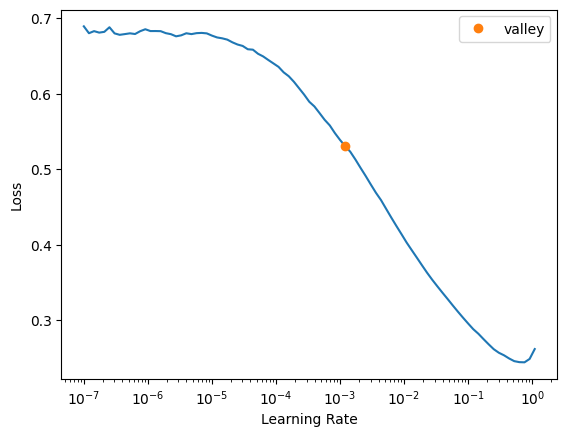

time: 3.09 s (started: 2024-01-25 12:43:12 +00:00)


In [ ]:
# # Determine best learning rate. The lr_find() function in fast.ai allows one to see the loss that different learning rates would cause.
learn.lr_find()

In [ ]:
# Fit model
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,precision_score,recall_score,f1_score,time
0,0.000652,0.001261,0.999947,0.999992,0.999965,0.999842,0.999903,01:00
1,0.000568,0.001784,0.999861,0.999959,0.999684,0.999807,0.999746,00:59
2,0.000182,0.000955,0.999899,0.999990,0.999824,0.999807,0.999816,01:00


time: 3min 1s (started: 2024-01-25 12:43:42 +00:00)


In [ ]:
# Generate test set
test_df = data_cleaned.copy()
test_df.drop(['Label'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

time: 5.4 s (started: 2024-01-25 12:47:32 +00:00)


In [ ]:
# Get preditction on test set
learn.get_preds(dl=dl)

(tensor([[9.9998e-01, 2.2554e-05],
         [9.9992e-01, 8.3448e-05],
         [1.0000e+00, 4.0951e-06],
         ...,
         [1.5950e-04, 9.9984e-01],
         [1.2331e-06, 1.0000e+00],
         [1.8396e-04, 9.9982e-01]]),
 None)

time: 17 s (started: 2024-01-25 12:47:41 +00:00)


In [ ]:
# load dataloaders on testset
dls = to.dataloaders()

time: 578 ms (started: 2024-01-25 12:48:02 +00:00)


In [ ]:
# Build learner
learn = tabular_learner(dls, layers=[200,100], metrics=[accuracy, RocAucBinary(),Precision(), Recall(), F1Score()])

time: 258 ms (started: 2024-01-25 12:48:09 +00:00)


In [ ]:
# Fit model on test set
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,precision_score,recall_score,f1_score,time
0,0.000074,0.000645,0.999861,1.000000,0.999737,0.999754,0.999746,03:33
1,0.000721,0.002785,0.999899,0.999986,0.999789,0.999842,0.999816,03:38
2,0.000015,0.003118,0.999651,0.999887,0.998878,0.999842,0.999360,03:35


time: 10min 47s (started: 2024-01-25 12:48:41 +00:00)


In [ ]:
# Now we'll get the predictions
nn_preds = learn.get_preds()[0]
nn_preds

tensor([[2.7395e-07, 1.0000e+00],
        [1.0000e+00, 9.9895e-07],
        [1.0000e+00, 1.1031e-06],
        ...,
        [3.2628e-07, 1.0000e+00],
        [1.0000e+00, 7.2094e-08],
        [1.0000e+00, 1.3483e-07]])

time: 24.5 s (started: 2024-01-25 12:59:30 +00:00)


Let's take a look at the confusion matrix.

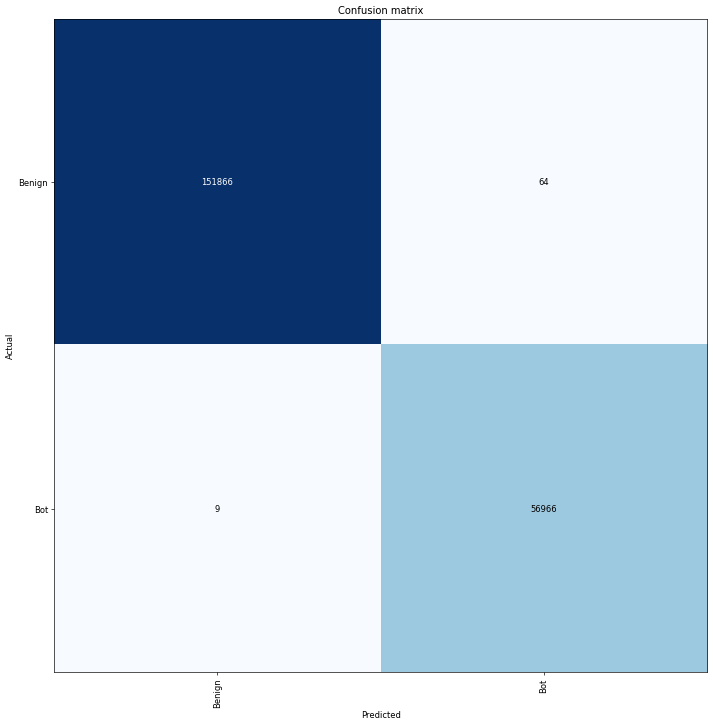

time: 51.3 s (started: 2024-01-25 13:00:29 +00:00)


In [ ]:
# Confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

The confusion matrix shows extremely low false positive and false negative scores indicating good recall and precision.

## Calculating AUC, ROC, and partial AUC with scikit-learn

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

preds, y = learn.get_preds()
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is TensorBase(0.9997) %.
time: 25.5 s (started: 2024-01-25 13:01:35 +00:00)


In [ ]:
# probs from preds
probs = np.exp(preds[:,1])

time: 1.94 ms (started: 2024-01-25 13:02:05 +00:00)


In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

time: 27.5 ms (started: 2024-01-25 13:02:11 +00:00)


In [ ]:
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9998870732916163
time: 964 µs (started: 2024-01-25 13:02:16 +00:00)


In [ ]:
# Compute partial AUC
p_auc = roc_auc_score(y, probs, max_fpr=0.05)
print('Partial AUC:', p_auc)

Partial AUC: 0.9988417773499105
time: 52 ms (started: 2024-01-25 13:08:00 +00:00)


In [ ]:
X, y = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

time: 1.19 s (started: 2024-01-25 13:32:39 +00:00)


# XGBoost and other models

In the second step, we take the data which we pre-processed using fast.ai and feed it into scikit-learn and train different models to compare the accuracy of the fast.ai deep learning framework with other machine learning algorithms.

In [ ]:
# Clear RAM
import gc

gc.collect()

0

time: 214 ms (started: 2023-12-25 14:24:49 +00:00)


As mentioned earlier, TabularPandas is a powerful and easy preprocessing tool for tabular data. Integration with libraries such as Random Forests and XGBoost requires only one extra step, that the .dataloaders call did for us. Let’s look at our to again. Its values are stored in a DataFrame like object, where we can extract the cats, conts, xs and ys if we want to:

In [ ]:
to.xs[:3]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
339573,6,3,-1.267935,-0.383069,-0.050561,-0.027347,-0.161102,-0.016270,-0.666603,1.180530,...,-0.159631,-1.818079,-0.059179,-0.048619,-0.069051,-0.047315,-0.275142,-0.072709,-0.2774,-0.270441
364791,19972,2,0.358520,-0.383122,-0.030067,-0.027347,-0.161997,-0.016624,-0.674092,-0.395619,...,-0.081501,0.493206,-0.059179,-0.048619,-0.069051,-0.047315,-0.275142,-0.072709,-0.2774,-0.270441
67212,1120,2,0.699551,-0.301711,0.031417,0.008978,0.420839,-0.008009,1.684916,-0.395619,...,0.309151,0.493206,-0.059179,-0.048619,-0.069051,-0.047315,-0.275142,-0.072709,-0.2774,-0.270441


time: 255 ms (started: 2023-12-25 14:24:52 +00:00)


Now that everything is encoded, you can then send this off to XGBoost or Random Forests by extracting the train and validation sets and their values: And now we can directly send this into the machine learning algorithms.

In [ ]:
# X, y = to.train.xs, to.train.ys.values.ravel()
# X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

time: 554 ms (started: 2023-12-25 14:24:58 +00:00)


In [ ]:
# Run ML Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                     nrounds = 'min.error.idx', num_class = 3,
                     maximize = False, eval_metric = 'logloss', eta = .1,
                     max_depth = 14, colsample_bytree = .4, n_jobs=-1)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
	print(msg)


LR: 97.945119 (1.183681)
LDA: 94.391829 (0.065824)
KNN: 99.995213 (0.002676)
CART: 99.996410 (0.002393)
GaussianNB: 84.009239 (0.111267)
BernoulliNB: 94.135014 (0.064526)
RF: 99.993657 (0.003344)
XGB: 99.997846 (0.001838)
time: 56min 40s (started: 2023-12-21 19:37:14 +00:00)


In [ ]:
# Create results dataframe

result02032018 = pd.DataFrame(columns=["Classifier", "Accuracy", "Standard Deviation"])

result02032018 = result02032018.append(pd.DataFrame([['Logistic Regression', 97.94, 1.18]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['LinearDiscriminantAnalysis', 94.39, 0.06]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['KNN', 99.99, 0.00]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['DecisionTreeClassifier', 99.99, 0.00]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['GaussianNB', 84.01, 0.11]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['BernoulliNB', 94.13, 0.06]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['RandomForestClassifier', 99.99, 0.00]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['XGBClassifier', 99.99, 0.00]], columns=["Classifier", "Accuracy", "Standard Deviation"]))
result02032018 = result02032018.append(pd.DataFrame([['fast.ai', 99.99, 0.00]], columns=["Classifier", "Accuracy", "Standard Deviation"]))

result02032018 = result02032018.sort_values('Accuracy', ascending=True)

time: 12.4 ms (started: 2023-12-21 20:34:38 +00:00)


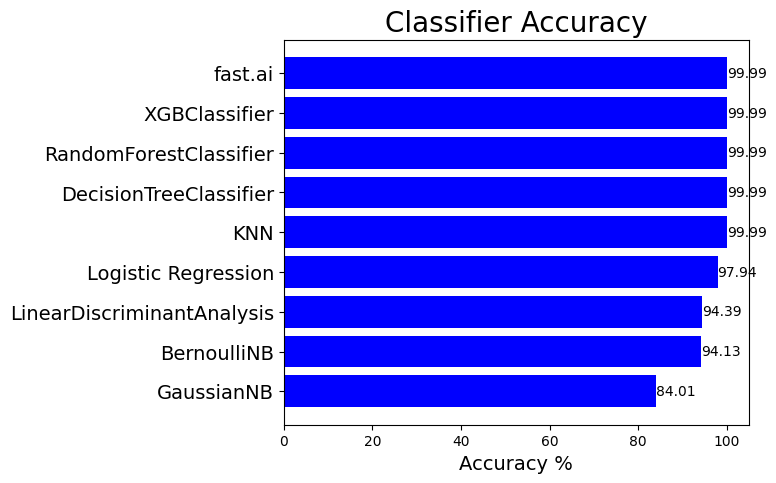

time: 263 ms (started: 2023-12-21 20:34:42 +00:00)


In [ ]:
# Plot results

fig, ax = plt.subplots(1,1, figsize=(6,5))

bars = ax.barh(result02032018['Classifier'], result02032018['Accuracy'], color="b")
ax.bar_label(bars)
ax.tick_params(axis="y", labelsize=14)
ax.set_xlabel('Accuracy %', fontsize=14)
ax.set_title('Classifier Accuracy', fontsize=20);

# ROC - AUC Scikit-Learn Models

In [ ]:
# Run ML Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                     nrounds = 'min.error.idx', num_class = 3,
                     maximize = False, eval_metric = 'logloss', eta = .1,
                     max_depth = 14, colsample_bytree = .4, n_jobs=-1)))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
	print(msg)


LR: 99.153800 (0.850168)
LDA: 96.837237 (0.065267)
KNN: 99.998331 (0.001695)
CART: 99.996904 (0.001656)
GaussianNB: 89.850179 (0.100174)
BernoulliNB: 98.859050 (0.025944)
RF: 99.999997 (0.000003)
XGB: nan (nan)
time: 54min 39s (started: 2023-12-25 14:34:34 +00:00)


In [ ]:
# Create results dataframe

result02032018_ROC_AUC = pd.DataFrame(columns=["Classifier", "ROC_AUC", "Standard Deviation"])

result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['Logistic Regression', 97.94, 1.18]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['LinearDiscriminantAnalysis', 94.39, 0.06]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['KNN', 99.99, 0.00]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['DecisionTreeClassifier', 99.99, 0.00]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['GaussianNB', 84.01, 0.11]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['BernoulliNB', 94.13, 0.06]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['RandomForestClassifier', 99.99, 0.00]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['XGBClassifier', 99.99, 0.00]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))
result02032018_ROC_AUC = result02032018_ROC_AUC.append(pd.DataFrame([['fast.ai', 99.99, 0.00]], columns=["Classifier", "ROC_AUC", "Standard Deviation"]))

result02032018_ROC_AUC = result02032018_ROC_AUC.sort_values('ROC_AUC', ascending=True)

In [ ]:
# Plot results

fig, ax = plt.subplots(1,1, figsize=(6,5))

bars = ax.barh(result02032018['Classifier'], result02032018['Accuracy'], color="b")
ax.bar_label(bars)
ax.tick_params(axis="y", labelsize=14)
ax.set_xlabel('Accuracy %', fontsize=14)
ax.set_title('Classifier Accuracy', fontsize=20);

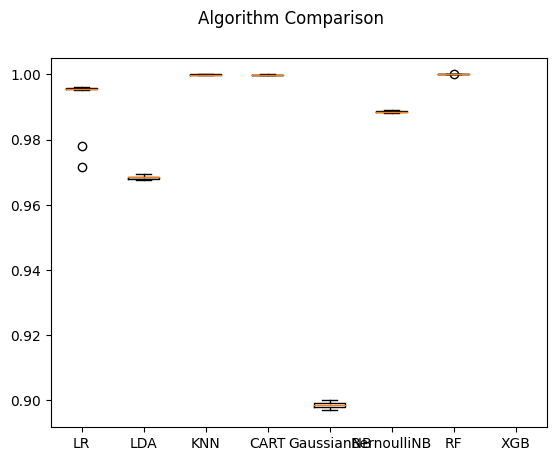

time: 171 ms (started: 2023-12-25 15:30:07 +00:00)


In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Partial AUC Scikit-Learn Models


In [ ]:
# Run ML Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# Make partial auc scorer
def auroc_with_maxfpr(y_true, y_score, **kwargs):
    return roc_auc_score(y_true, y_score, max_fpr=0.05)
p_auc = make_scorer(auroc_with_maxfpr, needs_prob = True, needs_threshold = True)

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=p_auc)
	results.append(cv_results)
	names.append(name)
	msg = "Partial AUC for %s: %f" % (name, cv_results.mean()*100)
	print(msg)

Partial AUC for LR: 92.546975
Partial AUC for LDA: 72.565984
Partial AUC for KNN: 99.989821
Partial AUC for CART: 99.989391
Partial AUC for GaussianNB: 55.073834
Partial AUC for BernoulliNB: 89.275340
Partial AUC for RF: 99.999955
Partial AUC for XGB: 99.999974
time: 50min 13s (started: 2024-01-25 15:08:56 +00:00)


In [ ]:
# Create results dataframe

result02032018_pauc = pd.DataFrame(columns=["Classifier", "Partial AUC"])

result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['Logistic Regression', 92.5469]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['LinearDiscriminantAnalysis', 72.5659]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['KNN', 99.9898]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['DecisionTreeClassifier', 99.9893]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['GaussianNB', 55.0738]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['BernoulliNB', 89.2753]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['RandomForestClassifier', 99.9999]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['XGBClassifier', 99.9999]], columns=["Classifier", "Partial AUC"]))
result02032018_pauc = result02032018_pauc.append(pd.DataFrame([['fast.ai', 99.8841]], columns=["Classifier", "Partial AUC"]))

result02032018_pauc = result02032018_pauc.sort_values('Partial AUC', ascending=True)

# Partial AUC for LR: 92.546975
# Partial AUC for LDA: 72.565984
# Partial AUC for KNN: 99.989821
# Partial AUC for CART: 99.989391
# Partial AUC for GaussianNB: 55.073834
# Partial AUC for BernoulliNB: 89.275340
# Partial AUC for RF: 99.999955
# Partial AUC for XGB: 99.999974
# time: 50min 13s (started: 2024-01-25 15:08:56 +00:00)

time: 11.3 ms (started: 2024-01-25 16:03:24 +00:00)


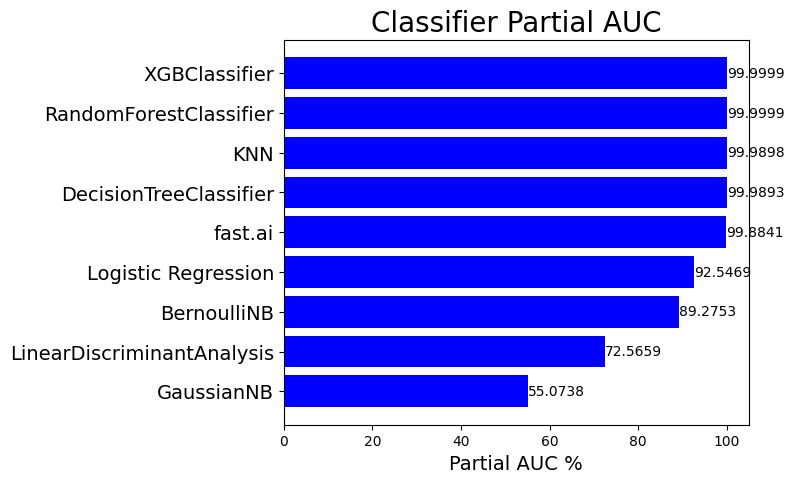

time: 237 ms (started: 2024-01-25 16:03:27 +00:00)


In [ ]:
# Plot results

fig, ax = plt.subplots(1,1, figsize=(6,5))

bars = ax.barh(result02032018_pauc['Classifier'], result02032018_pauc['Partial AUC'], color="b")
ax.bar_label(bars)
ax.tick_params(axis="y", labelsize=14)
ax.set_xlabel('Partial AUC %', fontsize=14)
ax.set_title('Classifier Partial AUC', fontsize=20);

# Testing partial AUC on individual model

In [ ]:
#from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

# Make partial auc scorer
def auroc_with_maxfpr(y_true, y_score, **kwargs):
    return roc_auc_score(y_true, y_score, max_fpr=0.05)
p_auc = make_scorer(auroc_with_maxfpr, needs_prob = True, needs_threshold = True)

kf = KFold(n_splits=10)
#model = GaussianNB()
model = XGBClassifier()

scores = cross_val_score(model, X, y, cv=kf, scoring=p_auc)
msg = "Partial AUC: %f" % (scores.mean()*100)
print(msg)


Partial AUC: 99.999974
time: 1min 7s (started: 2024-01-25 14:54:47 +00:00)
